In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df = pd.read_csv(r'd:\DaneshKar\Project_Eden\Clean_Loan.csv')

# نمایش داده‌ها
df.head(10)

,Dependents,Education,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Self_Employed_Yes,Log_ApplicantIncome,Log_CoapplicantIncome,Log_LoanAmount,BoxCox_Loan_Amount_Term
0,0,1,1.0,2,1,1,0,0,8.674197,0.000000,4.859812,1.623179e+07
1,1,1,1.0,0,0,1,1,0,8.430327,7.319202,4.859812,1.623179e+07
2,0,1,1.0,2,1,1,1,1,8.006701,0.000000,4.204693,1.623179e+07
3,0,0,1.0,2,1,1,1,0,7.857094,7.765993,4.795791,1.623179e+07
4,0,1,1.0,2,1,1,0,0,8.699681,0.000000,4.955827,1.623179e+07
5,2,1,1.0,2,1,1,1,1,8.597482,8.342125,5.590987,1.623179e+07
6,0,0,1.0,2,1,1,1,0,7.755339,7.324490,4.564348,1.623179e+07
7,3,1,0.0,1,0,1,1,0,8.018625,7.826044,5.068904,1.623179e+07
8,2,1,1.0,2,1,1,1,0,8.295798,7.331060,5.129899,1.623179e+07
9,1,1,1.0,1,0,1,1,0,9.460476,9.302828,5.857933,1.623179e+07


In [4]:
df2 = pd.read_csv(r'd:\DaneshKar\Project_Eden\Clean_Test.csv')

# نمایش داده‌ها
df2.head(10)

,Dependents,Education,Credit_History,Property_Area,Gender_Male,Married_Yes,Self_Employed_Yes,Log_ApplicantIncome,Log_CoapplicantIncome,Log_LoanAmount,BoxCox_Loan_Amount_Term
0,0,1,1.0,2,1,1,0,8.651899,0.000000,4.709530,1.757278e+07
1,1,1,1.0,2,1,1,0,8.031710,7.313887,4.844187,1.757278e+07
2,2,1,1.0,2,1,1,0,8.517393,7.496097,5.342334,1.757278e+07
3,2,1,1.0,2,1,1,0,7.758333,7.842671,4.615121,1.757278e+07
4,0,0,1.0,2,1,0,0,8.094684,0.000000,4.369448,1.757278e+07
5,0,0,1.0,2,1,1,1,7.680637,8.138273,5.030438,1.757278e+07
6,1,0,1.0,1,0,0,0,7.708411,0.000000,4.094345,1.757278e+07
7,2,0,0.0,0,1,1,0,8.264106,0.000000,4.997212,1.757278e+07
8,2,1,1.0,2,1,1,0,9.520322,0.000000,5.638355,5.185310e+06
9,0,0,1.0,1,1,0,0,7.783641,7.783641,4.820282,1.757278e+07


In [5]:
from sklearn.preprocessing import StandardScaler
# Exclude 'Loan_Status' from standardizing
columns_to_standardize = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col != 'Loan_Status']

scaler = StandardScaler()

# Fit on training data and transform both training and test data
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
df2[columns_to_standardize] = scaler.transform(df2[columns_to_standardize])



In [6]:
# شمارش تعداد هر لیبل در ستون Loan_Status
label_counts = df['Loan_Status'].value_counts()

print(label_counts)

Loan_Status
1    414
0    186
Name: count, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('Loan_Status', axis=1)  # ویژگی‌ها (بدون ستون هدف)
y = df['Loan_Status']  # هدف (پیش‌بینی وضعیت وام)
# تقسیم داده‌ها به مجموعه آموزشی و آزمایشی
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

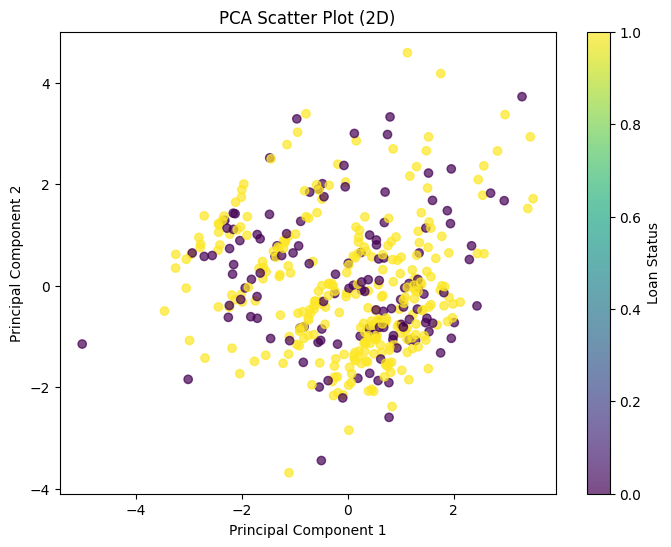

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xtrain)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=ytrain, cmap='viridis', alpha=0.7)
plt.colorbar(label='Loan Status')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot (2D)')
plt.show()

In [9]:
# # تقسیم داده‌ها به مجموعه آموزشی و آزمایشی
# from sklearn.model_selection import train_test_split
# Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
# from imblearn.over_sampling import RandomOverSampler
# oversampler = RandomOverSampler(sampling_strategy={0: 414, 1: 414}, random_state=42)
# X_train_smote, y_train_smote = oversampler.fit_resample(Xtrain, ytrain)

In [11]:
# from collections import Counter
# print("After balancing:")
# print(Counter(y_train_smote))

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# فرض بر این است که داده‌ها در df هستند
X = df.drop('Loan_Status', axis=1)  # ویژگی‌ها (بدون ستون هدف)
y = df['Loan_Status']  # هدف (پیش‌بینی وضعیت وام)

# تقسیم داده‌ها به مجموعه آموزشی و آزمایشی
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# # نرمال‌سازی داده‌ها (استفاده از MinMaxScaler)
# scaler = MinMaxScaler()
# Xtrain_scaled = scaler.fit_transform(Xtrain)
# Xtest_scaled = scaler.transform(Xtest)


# استفاده از PCA برای کاهش ابعاد
pca = PCA(n_components=0.95)  # حفظ 95 درصد واریانس داده‌ها
Xtrain_pca = pca.fit_transform(Xtrain)
Xtest_pca = pca.transform(Xtest)

# بررسی توزیع کلاس‌ها قبل از آموزش مدل
print("Class distribution before balancing:", Counter(ytrain))

# مدل Random Forest با تنظیم وزن‌های کلاس‌ها برای مقابله با مشکل عدم تعادل
class_weights = {0: 2, 1: 1}  # کلاس 0 دو برابر کلاس 1 وزن دارد
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)


# آموزش مدل با داده‌های کاهش یافته (PCA)
rf.fit(Xtrain_pca, ytrain)

# پیش‌بینی نتایج بر روی داده‌های آزمایشی
y_pred = rf.predict(Xtest_pca)

# ارزیابی مدل
print("Test Accuracy:", accuracy_score(ytest, y_pred))
print("Classification Report:")
print(classification_report(ytest, y_pred))

# بررسی توزیع کلاس‌ها پس از اعمال وزن‌دهی
print("Class distribution after training:", Counter(ytrain))


Class distribution before balancing: Counter({1: 290, 0: 130})
Test Accuracy: 0.7388888888888889
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.52      0.55        56
           1       0.79      0.84      0.82       124

    accuracy                           0.74       180
   macro avg       0.69      0.68      0.68       180
weighted avg       0.73      0.74      0.73       180

Class distribution after training: Counter({1: 290, 0: 130})


In [13]:
# from imblearn.over_sampling import RandomOverSampler
# oversampler = RandomOverSampler(random_state=42)
# X_train_balanced, y_train_balanced = oversampler.fit_resample(Xtrain, ytrain)
# print("After balancing:", Counter(y_train_balanced))
